In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from scipy.stats import skew, norm
from pandas_profiling import ProfileReport
from pathlib import Path, PurePath

np.random.seed(42)
%matplotlib inline

In [2]:
data_path = Path().resolve().parent/'data'

train_data = pd.read_csv(data_path/'train.csv')
train_data['ds'] = 'train'
test_data = pd.read_csv(data_path/'test.csv')
test_data['ds'] =  'test'

data = train_data.append([test_data])

target_columns = 'SalePrice'

In [3]:
print(data.shape, train_data.shape, test_data.shape, data['ds'].value_counts())
data.head()

(2919, 82) (1460, 82) (1459, 81) train    1460
test     1459
Name: ds, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice     ds  
0       WD         Normal   208500.0  train  
1       WD         Normal   181500.0  train  
2       WD         Normal   223500.0  train  
3       WD        Abnorml   140000.0  train  
4       WD         Normal   250000.0  train  

[5 rows x 82 columns]

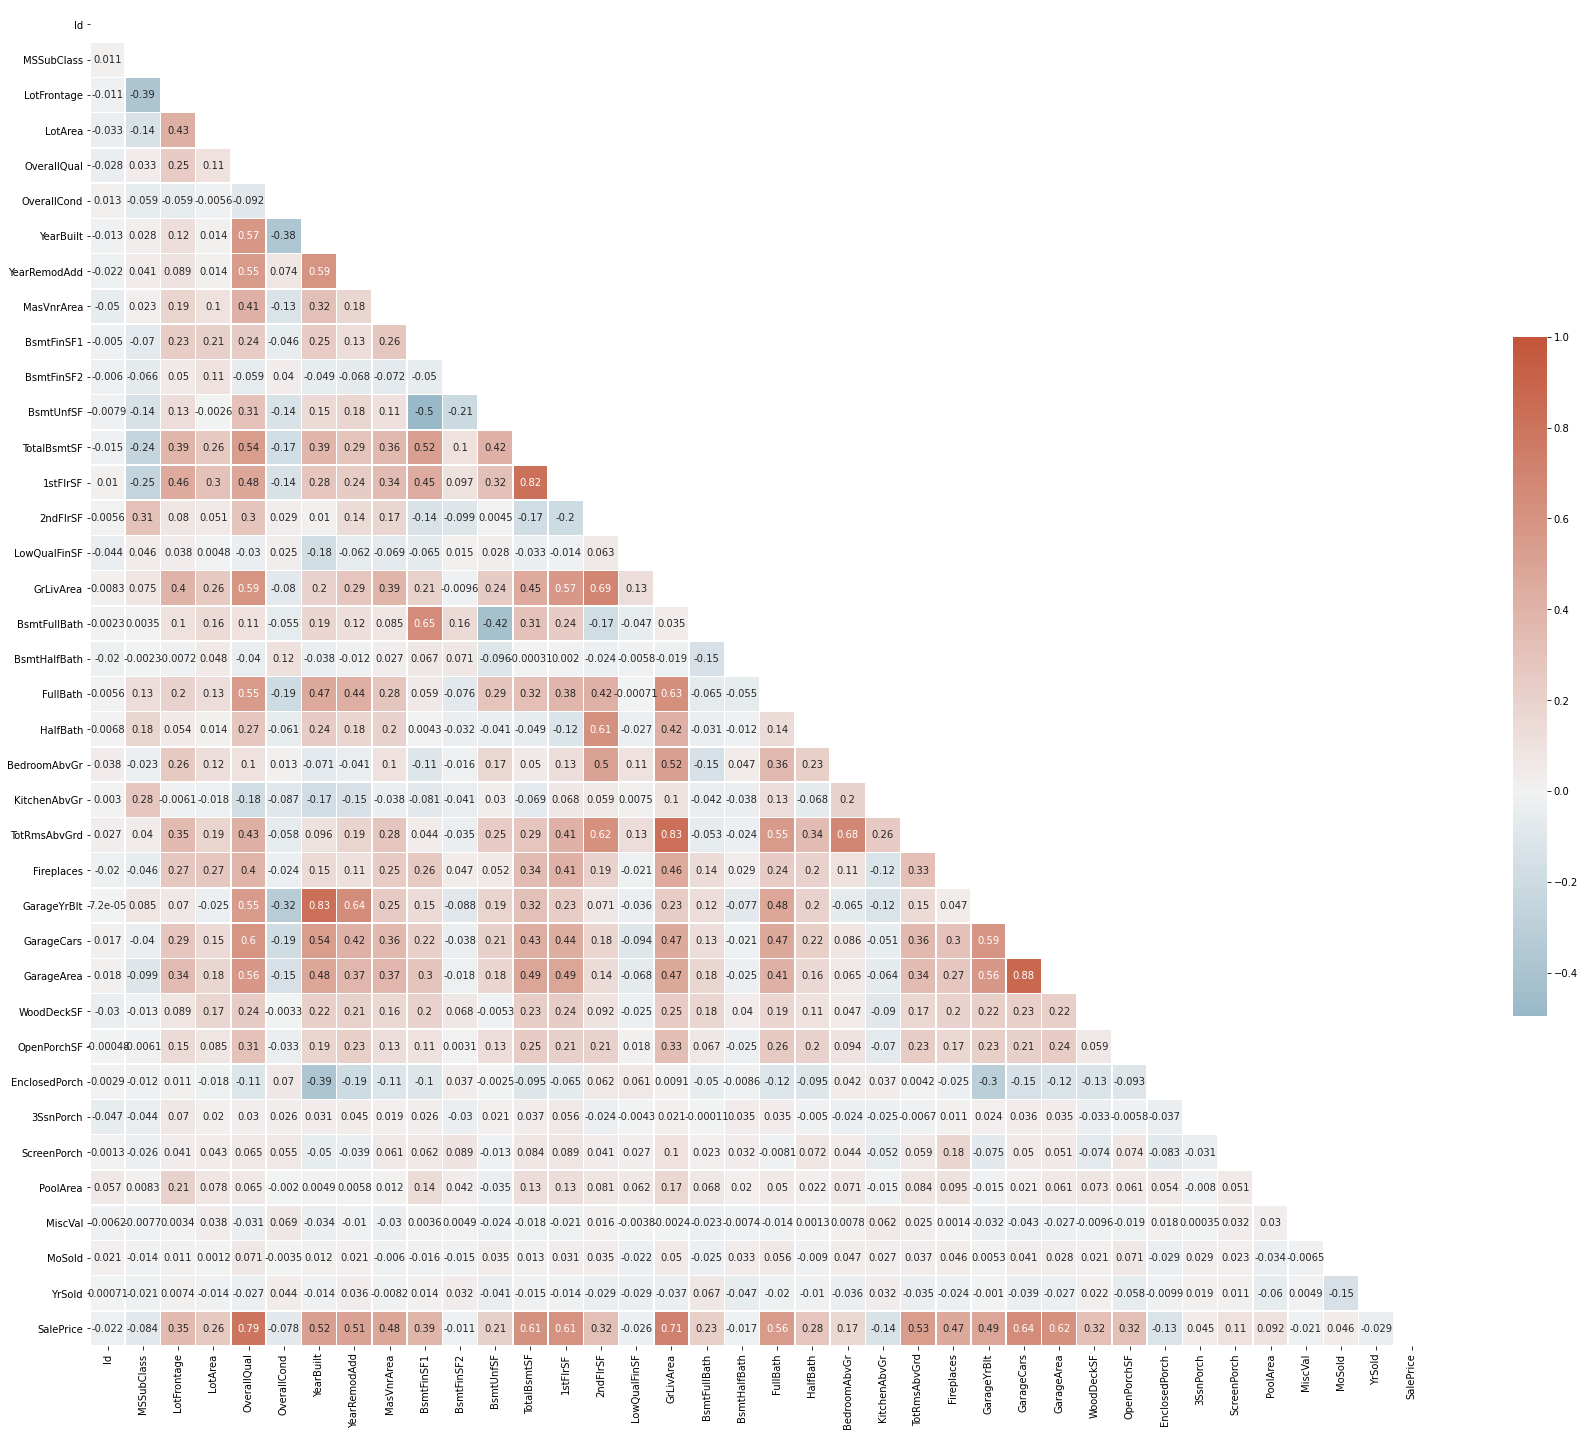

In [4]:
f, ax = plt.subplots(figsize=(30, 25))

mat = train_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [5]:
mat.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

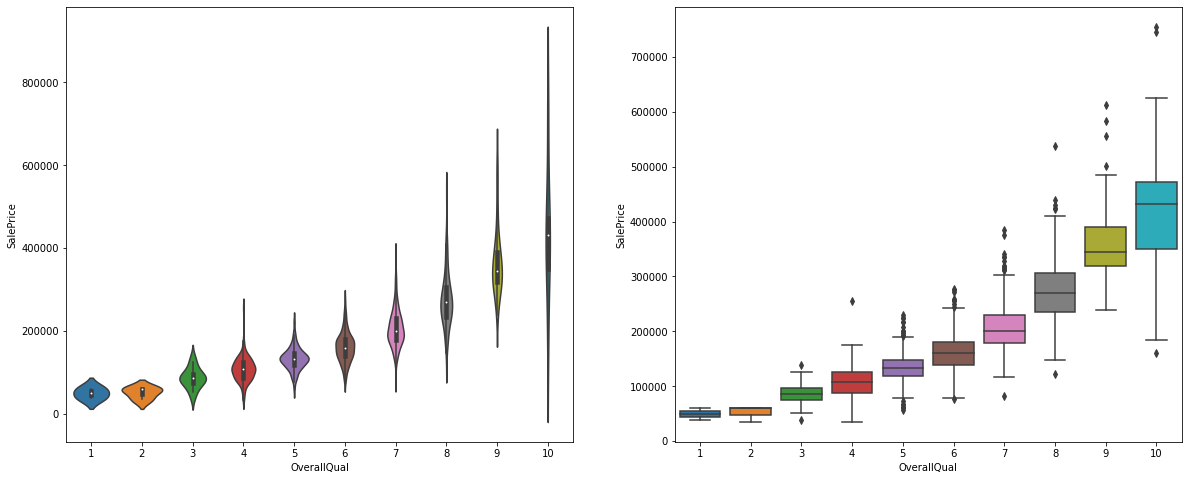

In [6]:
figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.violinplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.boxplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[1])
plt.show()

## Distribution checks

In [43]:
numeric_columns = list(mat.columns[1:-1].values)
categorical_columns = [col for col in data.columns if col not in list(mat.columns.values)][:-1]

### Numerical Dists

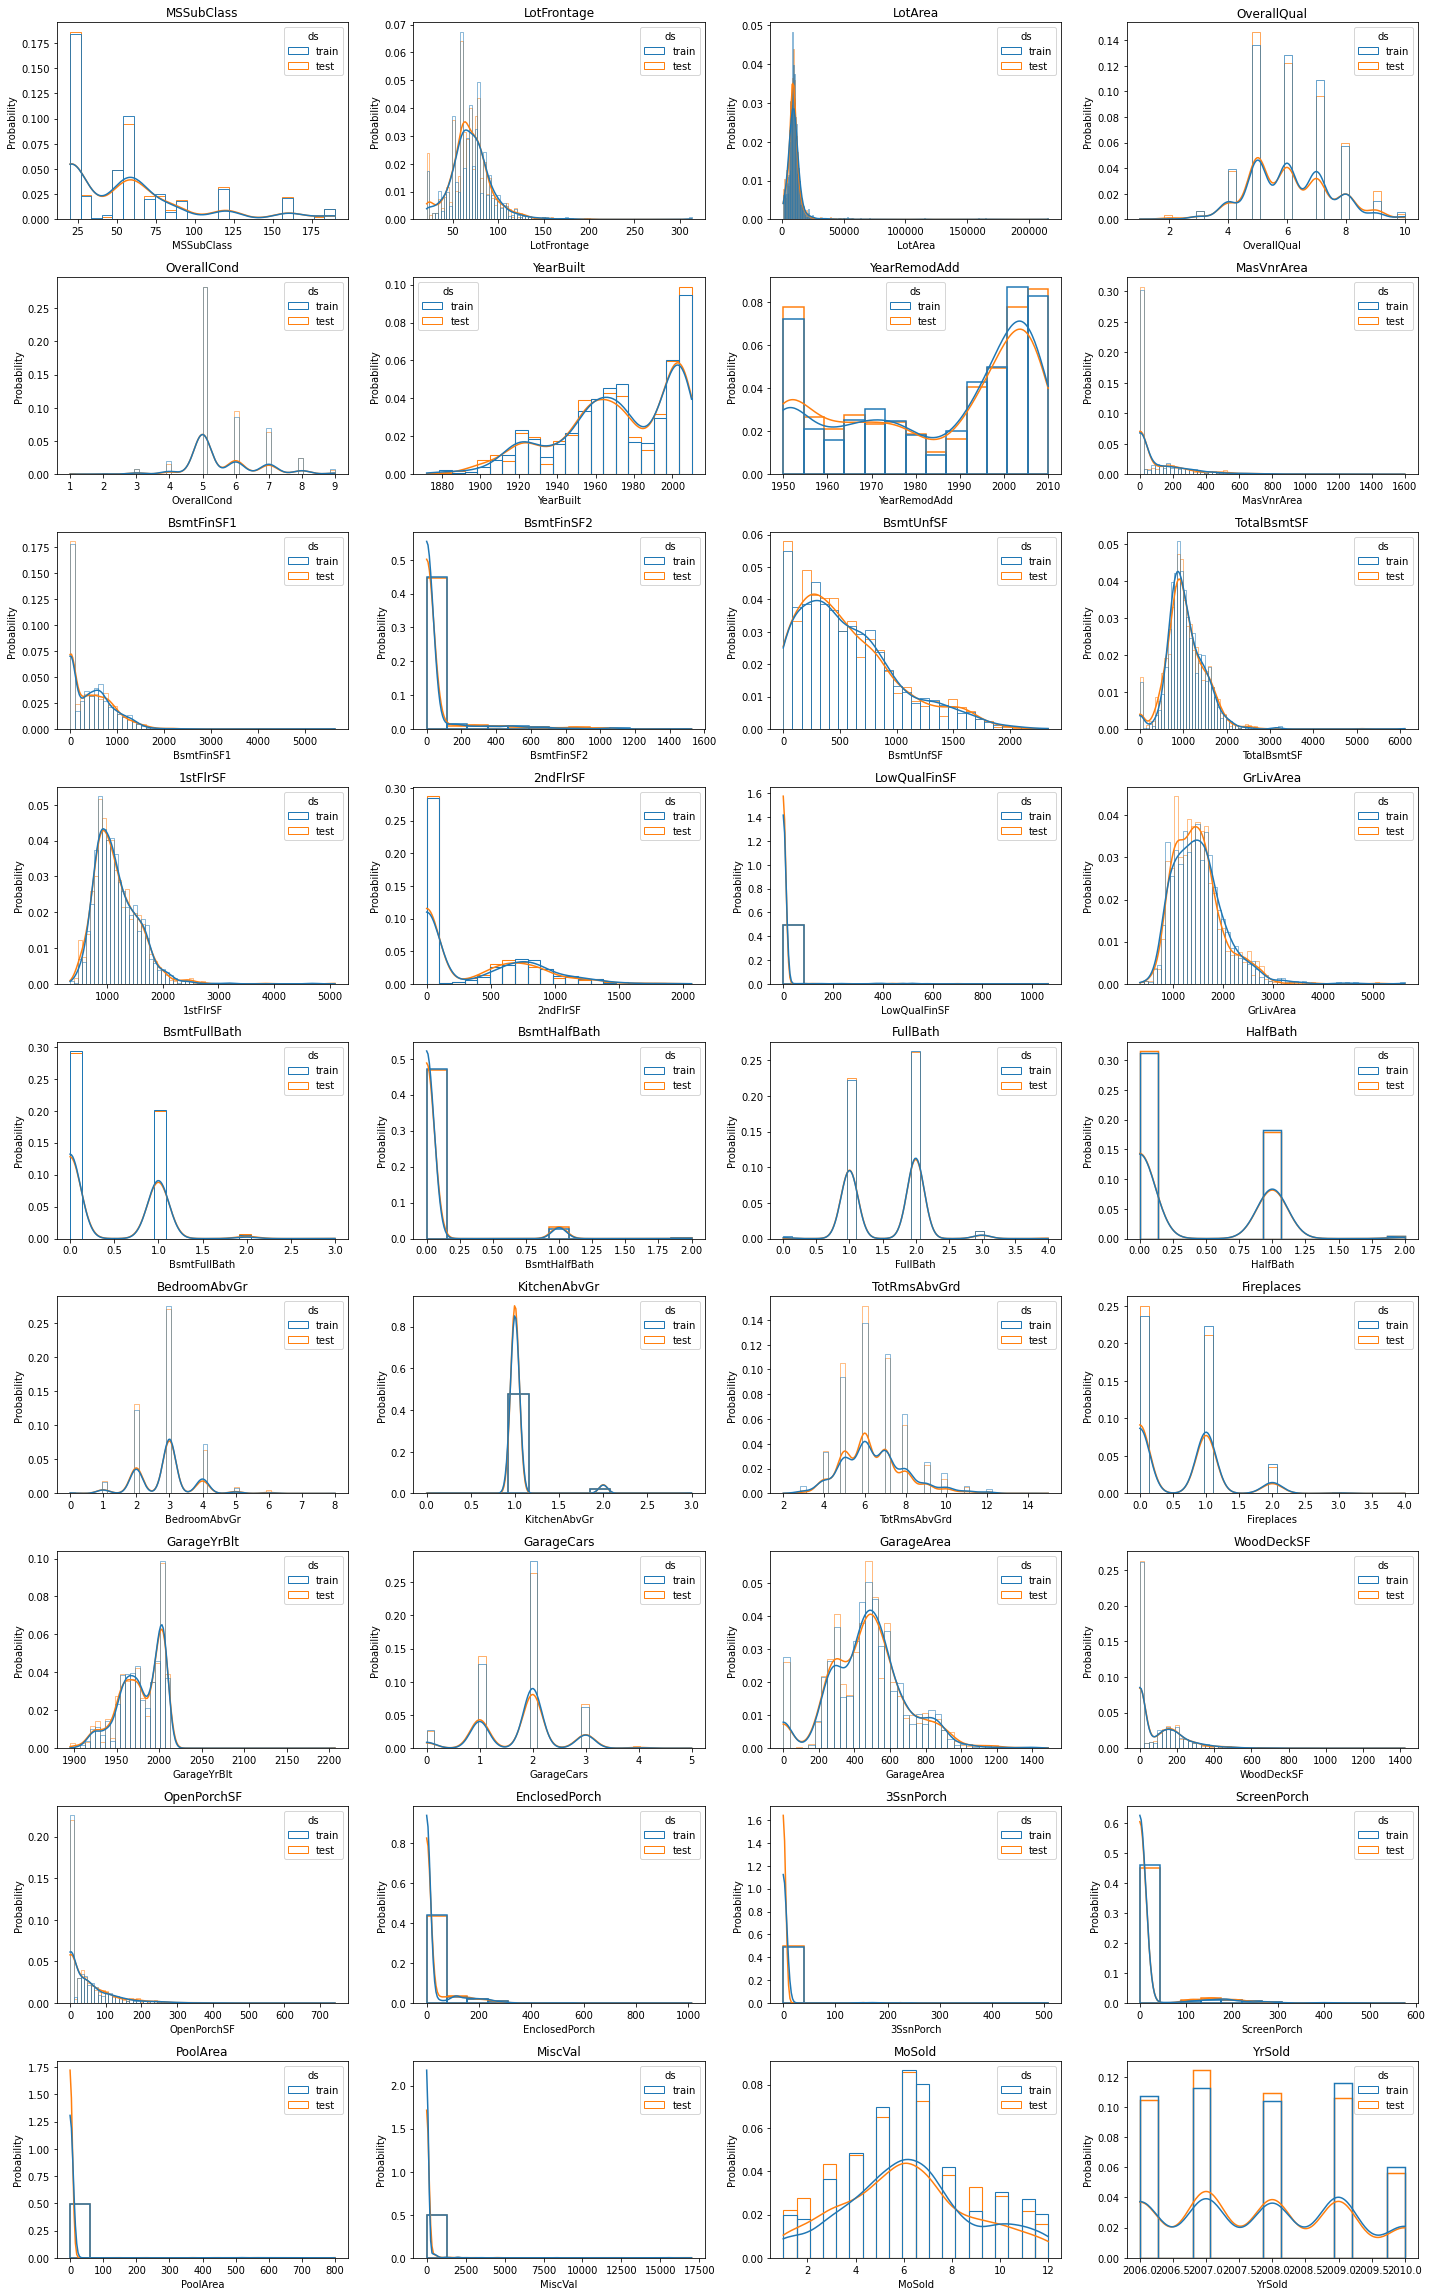

In [8]:
num_rows=9
num_cols=4
fig, ax = plt.subplots(num_rows, num_cols , figsize=(20, 32))
for row in range(num_rows):
    for col in range(num_cols):
        index=row*num_cols+col
        sns.histplot(x=numeric_columns[index], data=data, ax=ax[row][col], hue='ds', stat='probability', kde=True, fill=False).set_title(numeric_columns[index])

plt.tight_layout()      

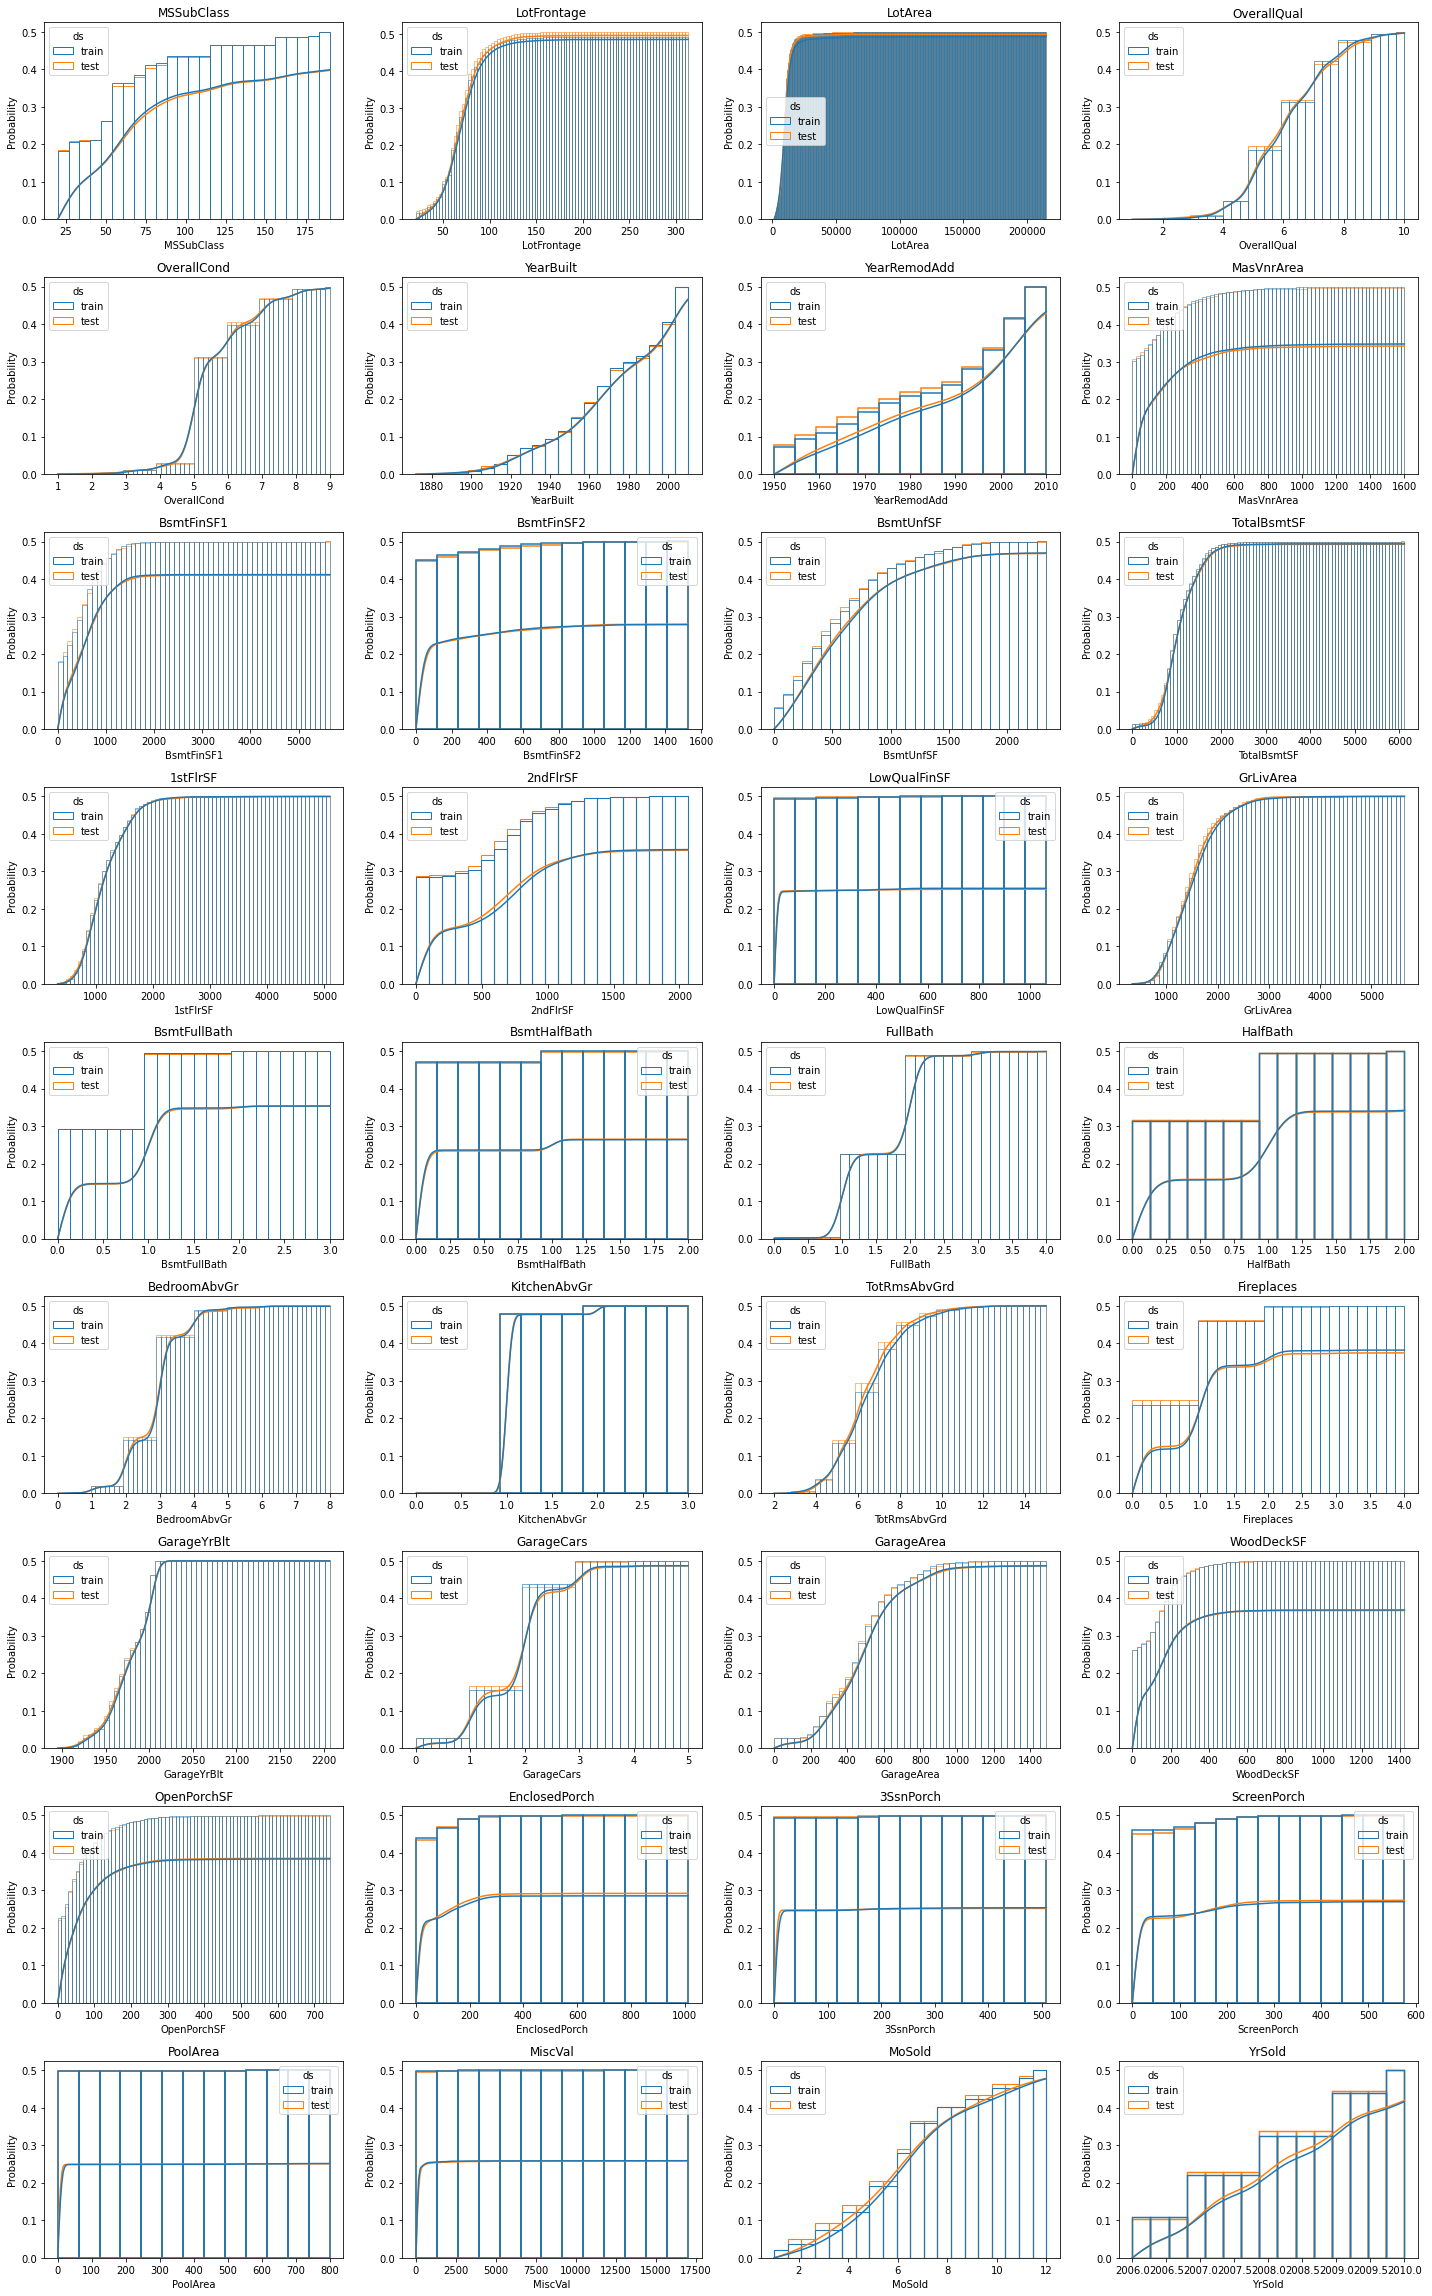

In [13]:
num_rows = 9
num_cols = 4
fig, ax = plt.subplots(num_rows, num_cols , figsize=(20, 32))
for row in range(num_rows):
    for col in range(num_cols):
        index = row*num_cols+col
        sns.histplot(x=numeric_columns[index], data=data, ax=ax[row][col], hue='ds', stat='probability', kde=True, fill=False, cumulative=True).set_title(numeric_columns[index])
plt.tight_layout()      

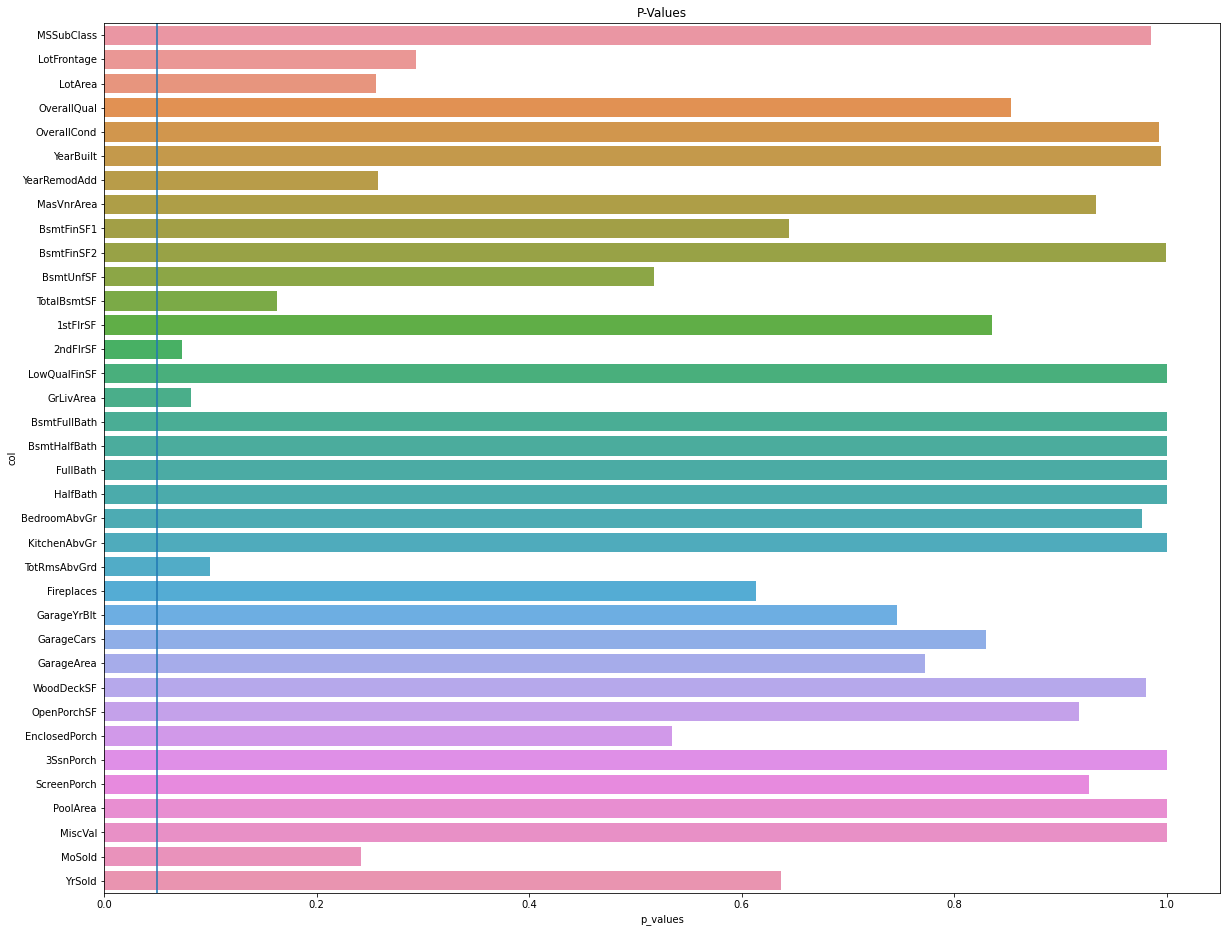

In [33]:
dist_diffs = {'col': [], 'p_values': []}
for ncol in numeric_columns: 
    dist_diffs['col'].append(ncol)
    dist_diffs['p_values'].append(stats.ks_2samp(data[data.ds=='train'][ncol], data[data.ds=='test'][ncol])[1])

plt.figure(figsize=(20, 16))
sns.barplot(y='col', x='p_values', data=pd.DataFrame(dist_diffs)).set_title("P-Values")
plt.axvline(0.05);

### Cateogorical Variables

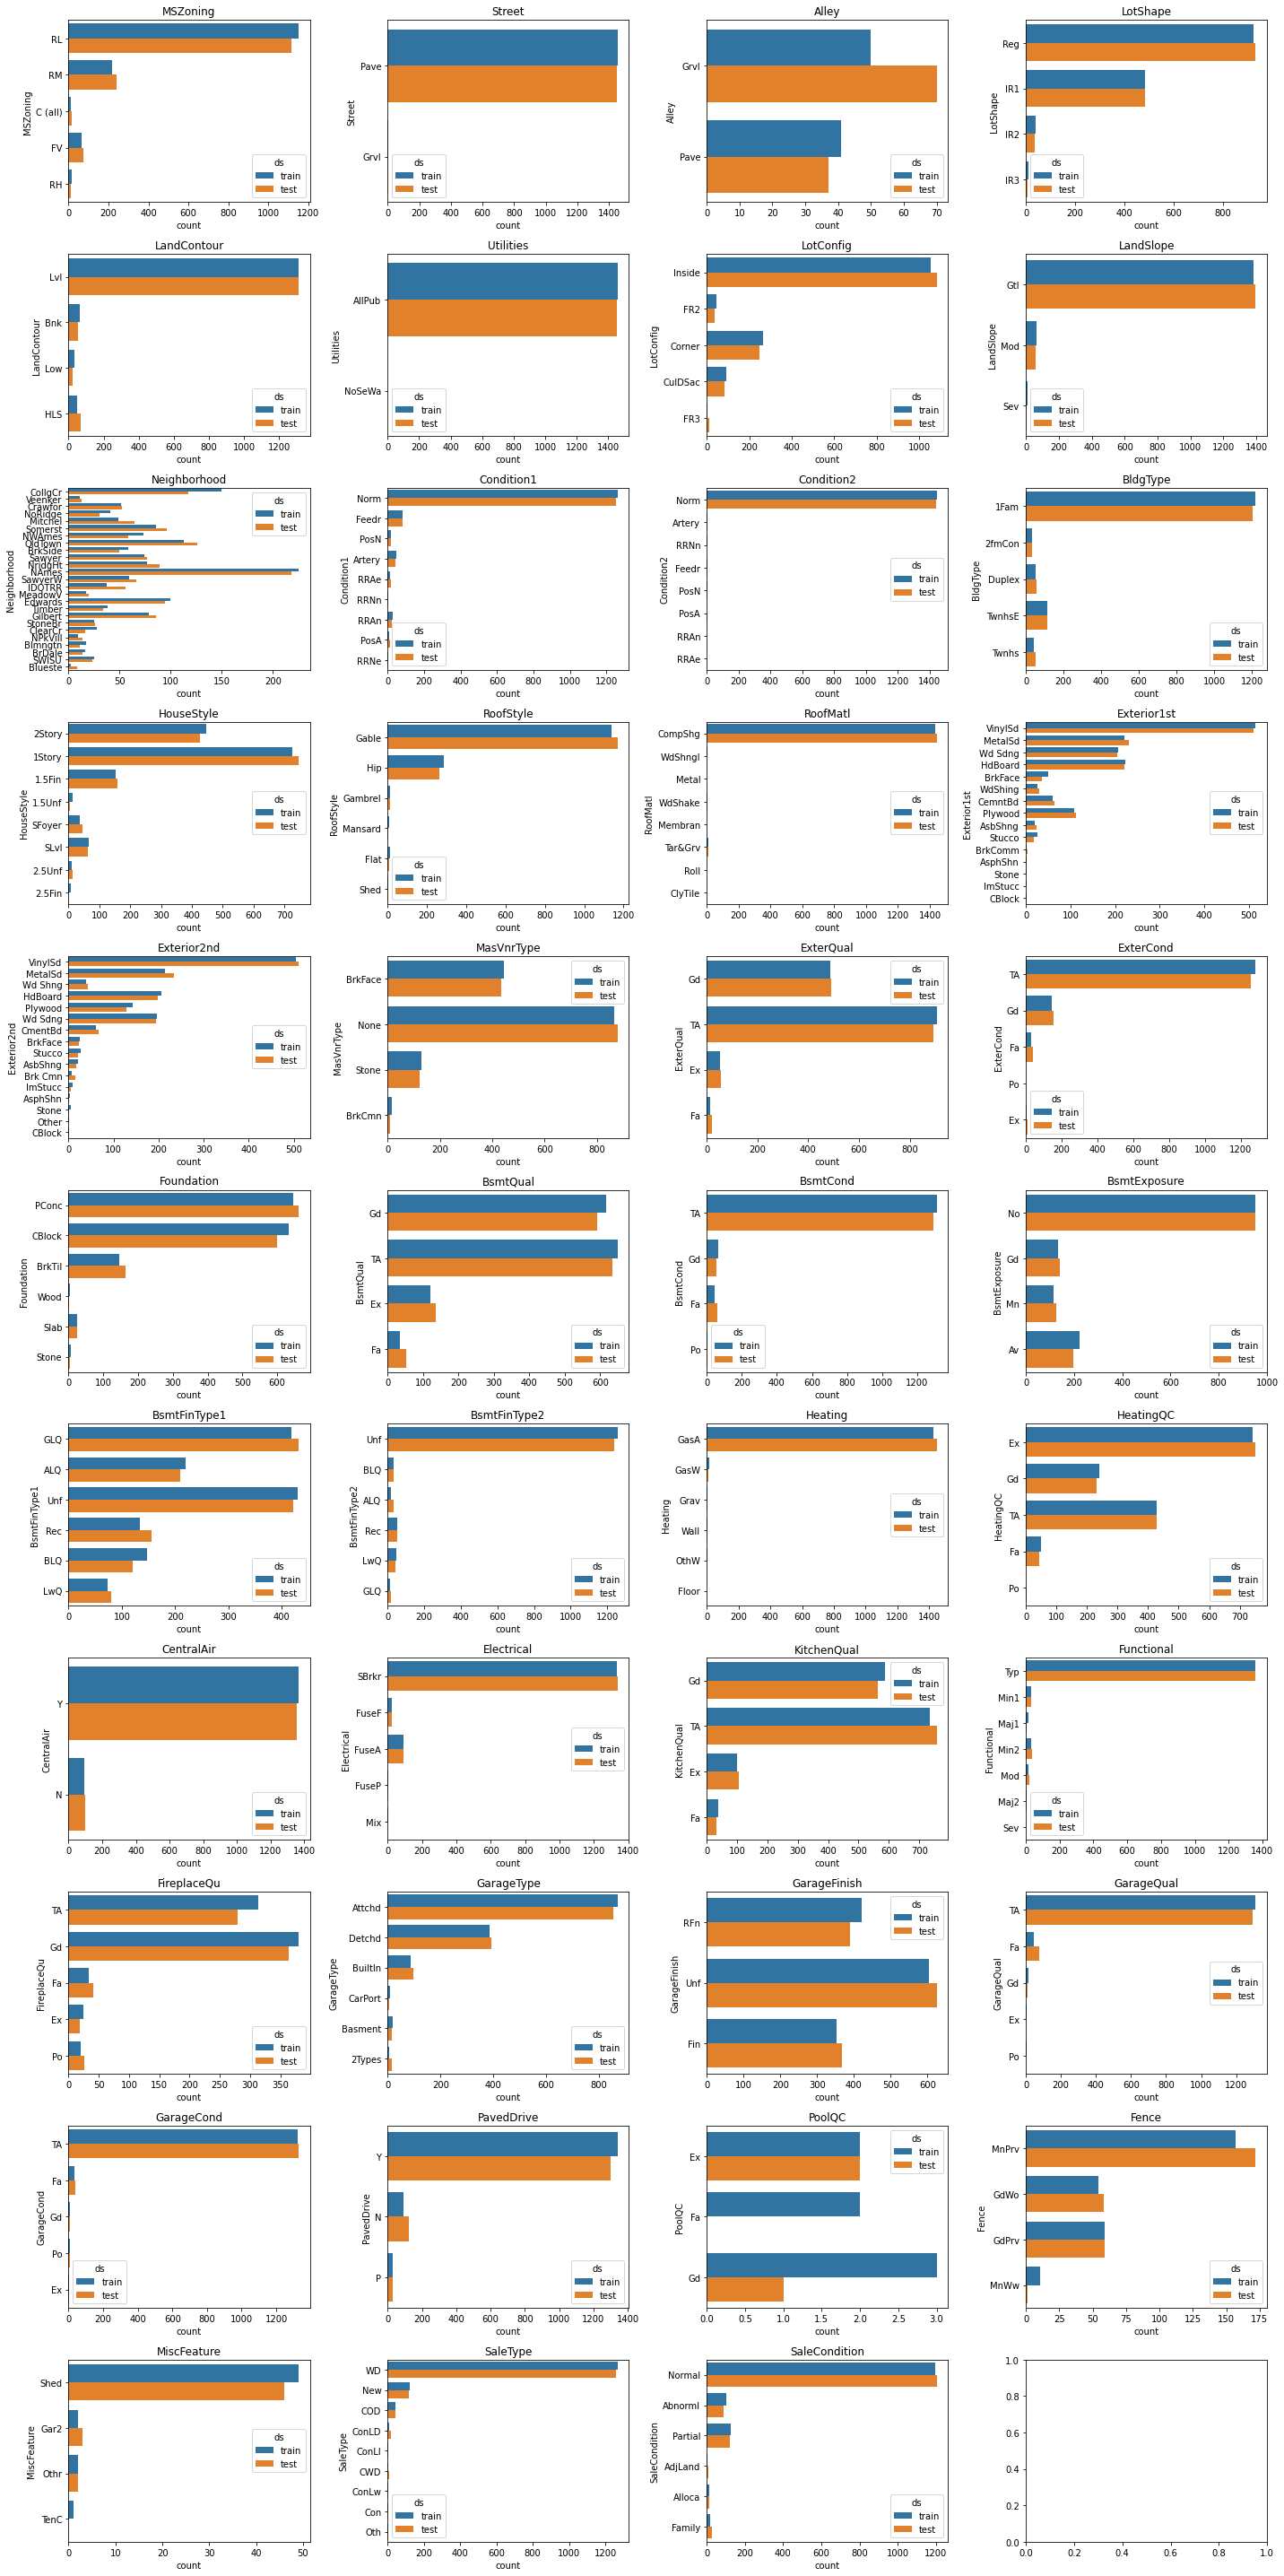

In [47]:
num_rows=11
num_cols=4
fig, ax = plt.subplots(num_rows, num_cols , figsize=(20, 40))
for row in range(num_rows):
    for col in range(num_cols):
        index=row*num_cols+col
        if index < len(categorical_columns):
            sns.countplot(y=categorical_columns[index], data=data, ax=ax[row][col], hue='ds').set_title(categorical_columns[index])

plt.tight_layout()     

/home/cryptexis/dev/anaconda2/envs/dev-env3/lib/python3.7/site-packages/scipy/stats/stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


{'train_bigger': 10, 'test_bigger': 0, 'train_bigger_cols': ['Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical', 'GarageQual', 'PoolQC', 'MiscFeature'], 'test_bigger_cols': []}


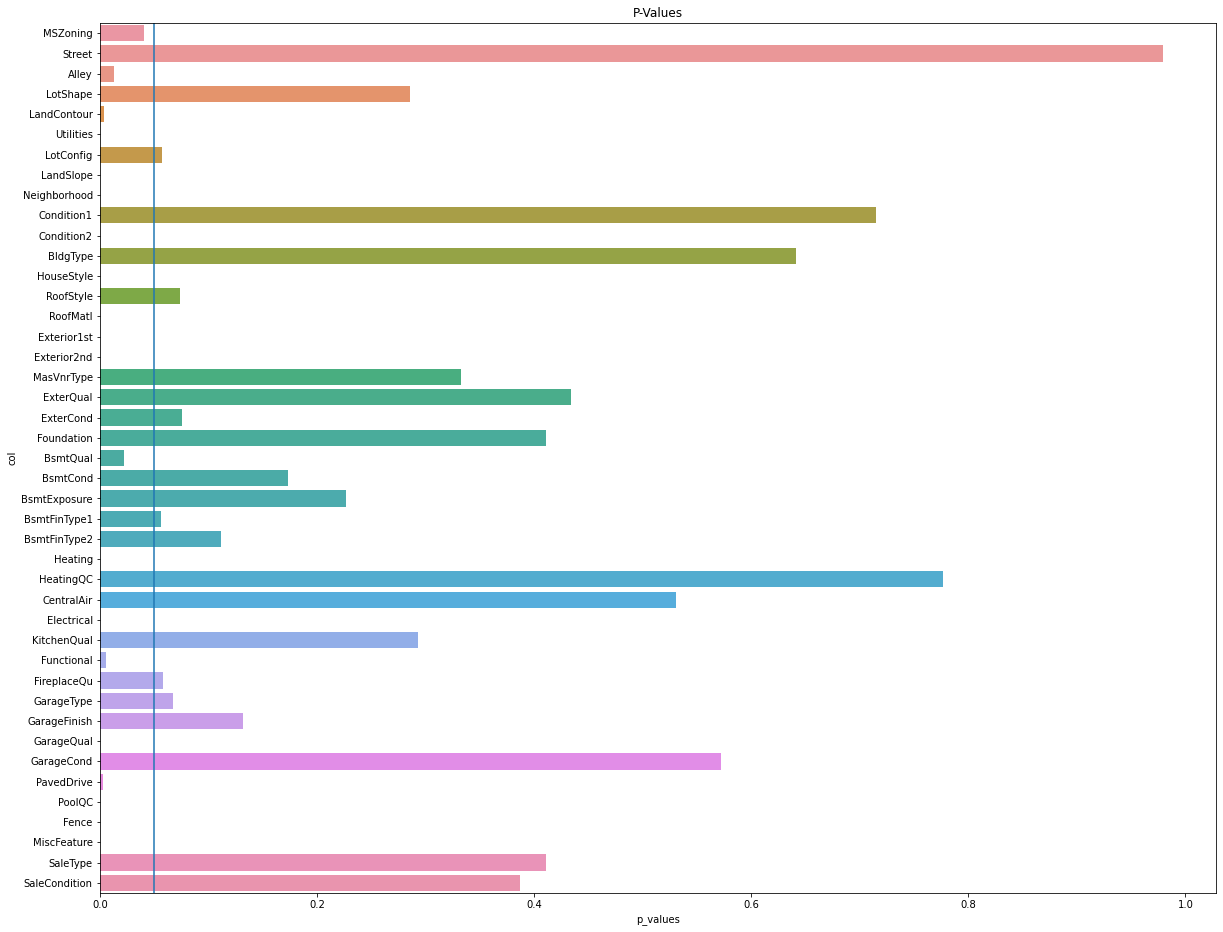

In [91]:
dist_diffs = {'col': [], 'p_values': []}
stats_dict = {"train_bigger": 0,
         "test_bigger": 0,
         "train_bigger_cols": [],
         "test_bigger_cols": []
        }

for ncol in categorical_columns: 
    dist_diffs['col'].append(ncol)
    train_freqs = data[data.ds=='train'][ncol].value_counts().sort_index()
    test_freqs = data[data.ds=='test'][ncol].value_counts().sort_index()
    try:
        dist_diffs['p_values'].append(
            stats.chisquare(train_freqs, test_freqs)[1]
        )
    except Exception as e:
        
        if train_freqs.shape[0] > test_freqs.shape[0]:
            stats_dict['train_bigger']+=1
            stats_dict['train_bigger_cols'].append(ncol)
            
            missing_cols = [mcol for mcol in train_freqs.index.values if  mcol not in test_freqs.index.values]
            for mcol in missing_cols:
                    test_freqs[mcol] = 0
        else:
            stats_dict['test_bigger']+=1
            stats_dict['test_bigger_cols'].append(ncol)
            
            missing_cols = [mcol for mcol in test_freqs.index.values if  mcol not in train_freqs.index.values]
            for mcol in missing_cols:
                    train_freqs[mcol] = 0

        dist_diffs['p_values'].append(
            stats.chisquare(train_freqs, test_freqs)[1]
        )
print(stats_dict)
plt.figure(figsize=(20, 16))
sns.barplot(y='col', x='p_values', data=pd.DataFrame(dist_diffs)).set_title("P-Values")
plt.axvline(0.05);

In [98]:
col_name = 'Electrical'
data[data.ds=='train'][col_name].value_counts().sort_index(), data[data.ds=='test'][col_name].value_counts().sort_index()

(FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 SBrkr    1334
 Name: Electrical, dtype: int64,
 FuseA      94
 FuseF      23
 FuseP       5
 SBrkr    1337
 Name: Electrical, dtype: int64)

<AxesSubplot:xlabel='count', ylabel='col'>

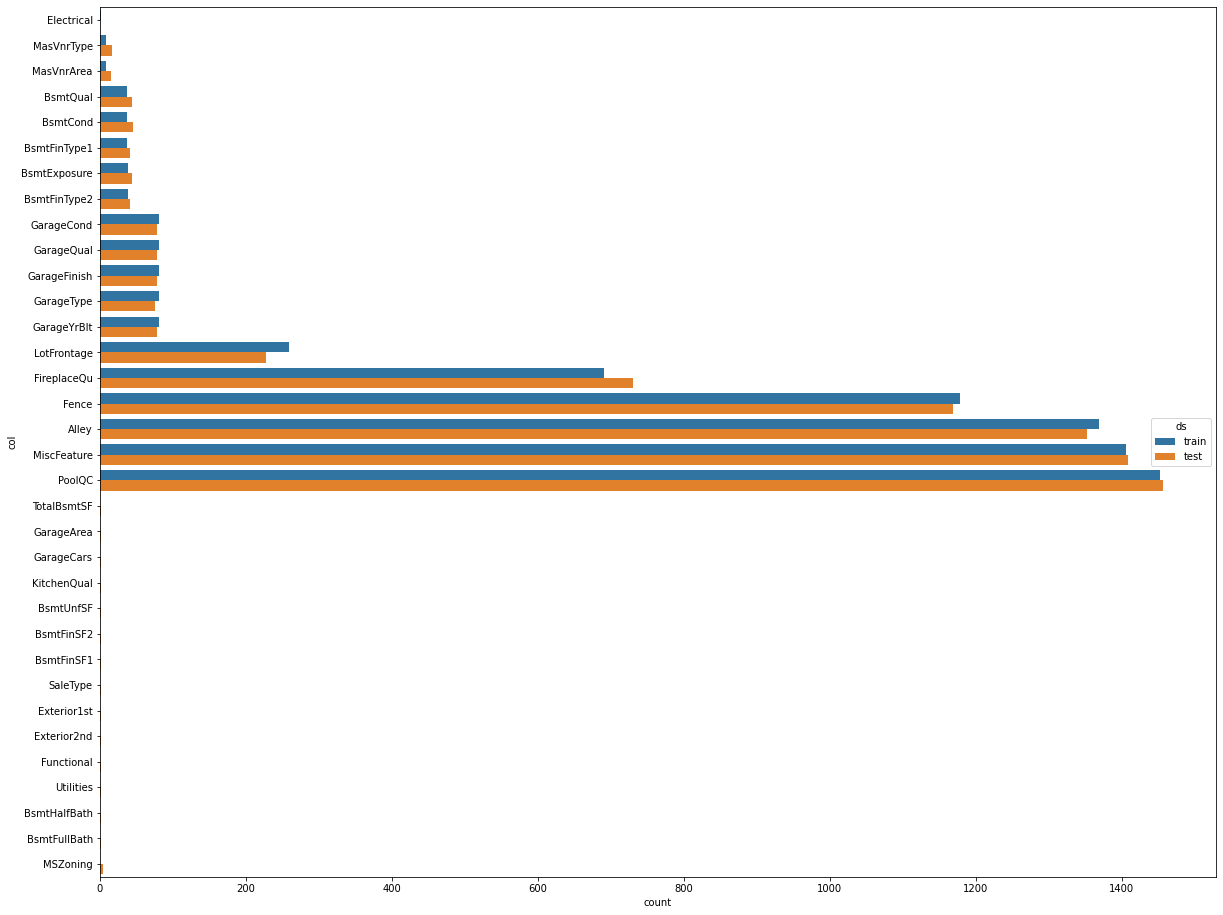

In [121]:
def count_missing(df, target):
    df = df.copy()
    df = df.drop(target, axis=1)
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)   
    missing = missing.to_frame().reset_index().rename(columns={'index': 'col', 0: 'count'})
    return missing

plt.figure(figsize=(20, 16))
train_missing = count_missing(data[data.ds=='train'], 'SalePrice')
train_missing['ds'] = 'train'
test_missing = count_missing(data[data.ds=='test'], 'SalePrice')
test_missing['ds'] = 'test'
missing_data = train_missing.append([test_missing])

sns.barplot(x='count', y='col', hue='ds', data=missing_data)


In [ ]:
data[data.ds=='']